In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [21]:
us_change = pd.read_csv("data/us_change.csv")

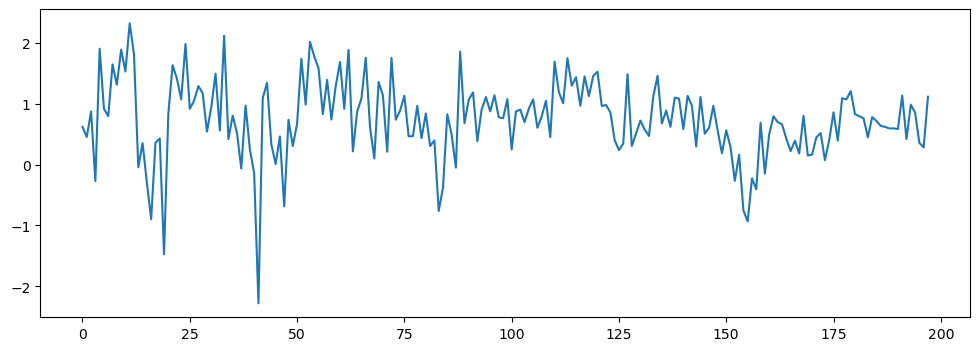

In [22]:
plt.figure(figsize=(12,4))
plt.plot(us_change["Consumption"])

## Teste de Stacionariedade

In [23]:
# KPSS test
kpss_test = kpss(us_change["Consumption"], regression='c')  # 'c' for constant trend; use 'ct' for linear trend

# Results
print("KPSS Statistic:", kpss_test[0])
print("p-value:", kpss_test[1])
print("Number of Lags:", kpss_test[2])
print("Critical Values:", kpss_test[3])

# Interpretation
if kpss_test[1] < 0.05:
    print("Reject the null hypothesis: The series is non-stationary.")
else:
    print("Fail to reject the null hypothesis: The series is stationary.")

KPSS Statistic: 0.22119037961296312
p-value: 0.1
Number of Lags: 8
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Fail to reject the null hypothesis: The series is stationary.


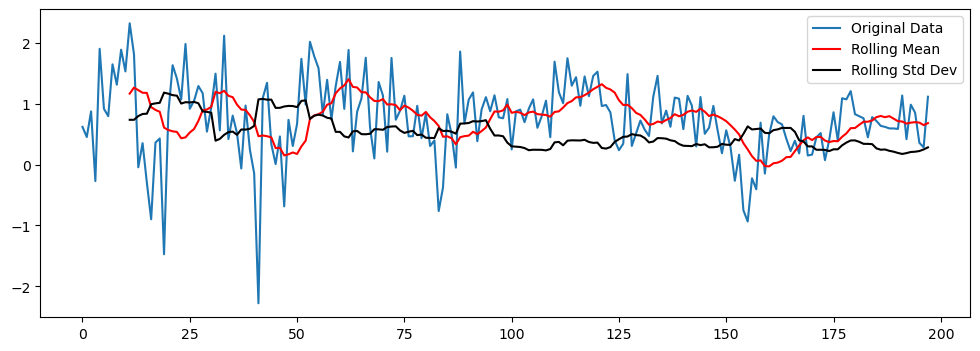

In [24]:
data_rolling_mean = us_change["Consumption"].rolling(window=12).mean()
data_rolling_std = us_change["Consumption"].rolling(window=12).std()

plt.figure(figsize=(12, 4))
plt.plot(us_change["Consumption"], label='Original Data')
plt.plot(data_rolling_mean, label='Rolling Mean', color='red')
plt.plot(data_rolling_std, label='Rolling Std Dev', color='black')
plt.legend()
plt.show()

## Decomposição da Série

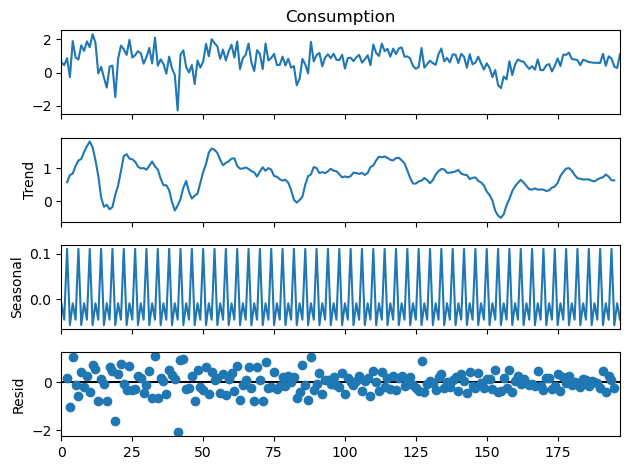

In [25]:
# Decomposition
decomposition = seasonal_decompose(us_change["Consumption"], model="additive", period=4)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
decomposition.plot()
plt.show()

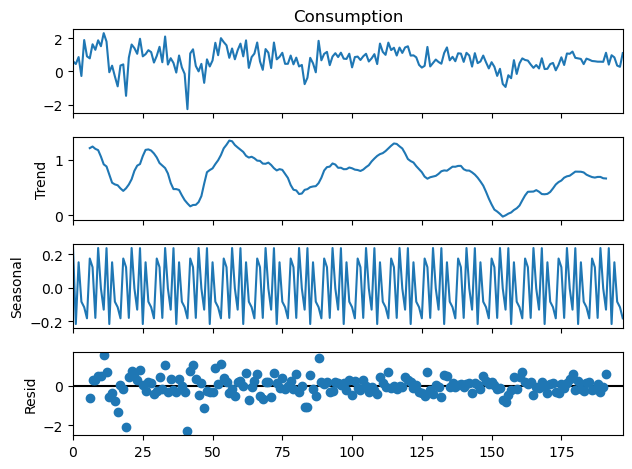

In [30]:
decomposition = seasonal_decompose(us_change["Consumption"], model="additive", period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot components
decomposition.plot()
plt.show()